<a href="https://colab.research.google.com/github/sambonuruddeen/DSN/blob/main/DSN_AI_Bootcamp_Qualification_Hackathon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [ ]:
#load data
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DSN AI Bootcamp/Train.csv")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DSN AI Bootcamp/Test.csv")
sample_submission = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DSN AI Bootcamp/SampleSubmission.csv")


In [ ]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [ ]:
train.tail()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.0,770998.0,9637475.0,4047934.0,11641992.0,19910965.0,NaN,983003.0,25985589.0,48187375,86615907.0,0.0,0.0,0.0,0.0,0.0,31.740,1662.15,0.0,15.810,2815.5,7299.0,4866.0,60772.0,15969.0,1034.0,NaN,864.0,21.6666,0.0,0.0,4.0,8.0,8.0,0.0,NaN,NaN,0.000000,9.09,0.730040,NaN,0.0,lending,591.048913,0.0,0.241598,no
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.0,NaN,927765.0,NaN,NaN,1849306.0,571052.0,NaN,0.0,16576457,NaN,NaN,NaN,0.0,0.0,1.0,NaN,13350.00,NaN,NaN,1840.5,5475.0,3650.0,60.0,11589.0,1642.0,11589.0,242.0,14.6666,0.0,NaN,28.0,0.0,34.0,0.0,158.025,136.5135,0.297913,30.30,0.498208,NaN,0.0,lending,NaN,0.0,NaN,yes
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.0,118645.0,3662435.0,3662435.0,3585024.0,704090.0,NaN,2765401.0,4226874.0,21973443,87508273.0,0.0,0.0,0.0,2.0,2.0,119.565,2206.95,12690.0,119.565,1059.0,3924.0,2616.0,2980.0,12135.0,NaN,NaN,232.0,22.3334,0.0,0.0,6.0,0.0,4.0,0.0,NaN,NaN,0.550000,3.03,0.450512,0.0,0.0,lending,1252.474467,2.0,0.163153,no
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.0,NaN,3458599.0,NaN,115533.0,3458599.0,508812.0,NaN,0.0,38549900,20238892.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2373.0,NaN,NaN,60.0,25641.0,852.0,NaN,104.0,57.5000,1.0,NaN,10.0,2.0,8.0,1.0,NaN,150.0000,0.942854,0.00,0.705048,1.0,0.0,charge,NaN,0.0,0.002997,no
55999,Apcnt_999996,3522.0,0.46930,0.0000,0.0000,0.0,98806.0,2053920.0,523983.0,14903368.0,5430440.0,NaN,8381783.0,5490346.0,21973443,38370960.0,0.0,0.0,0.0,3.0,3.0,116.445,1680.00,1680.0,93.825,5361.0,16515.0,11010.0,1278.0,22083.0,NaN,NaN,1410.0,0.8334,0.0,NaN,20.0,8.0,2.0,0.0,NaN,NaN,0.000000,13.13,0.292424,NaN,NaN,charge,4986.188578,3.0,0.678245,no


In [ ]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [ ]:
missing_vals = train.isnull().sum()
pmv = (missing_vals/len(train)) * 100
ll = pd.concat([missing_vals, pmv], axis=1)
print(ll)

                    0          1
Applicant_ID        0   0.000000
form_field1      2529   4.516071
form_field2      3844   6.864286
form_field3       355   0.633929
form_field4       355   0.633929
form_field5       355   0.633929
form_field6     13360  23.857143
form_field7      5163   9.219643
form_field8     13360  23.857143
form_field9      8008  14.300000
form_field10      355   0.633929
form_field11    31421  56.108929
form_field12     9895  17.669643
form_field13     5889  10.516071
form_field14        0   0.000000
form_field15    22475  40.133929
form_field16    13036  23.278571
form_field17    11151  19.912500
form_field18    10402  18.575000
form_field19        4   0.007143
form_field20      355   0.633929
form_field21    15854  28.310714
form_field22    20400  36.428571
form_field23    28123  50.219643
form_field24    13297  23.744643
form_field25     5450   9.732143
form_field26     7438  13.282143
form_field27     9299  16.605357
form_field28      355   0.633929
form_field

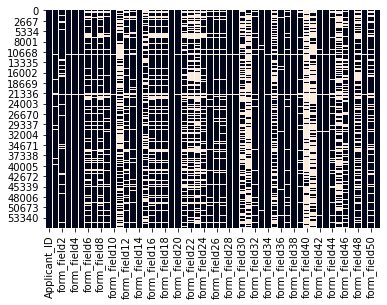

In [ ]:
sns.heatmap(train.isnull(), cbar=False)

In [ ]:
#separate features from target
X_train = train.drop(['Applicant_ID','default_status'], axis=1)
y_train = train['default_status']
print(X_train.shape)
print(y_train.shape)

(56000, 50)
(56000,)


In [ ]:
#check for missing test data
miss_test = test.isnull().sum()
mtp = (miss_test/len(test)) * 100
mis_tt = pd.concat([miss_test, mtp], axis=1)
print(mis_tt)
X_test = test.drop(['Applicant_ID'], axis=1)
print(X_test.shape)

                  0          1
Applicant_ID      0   0.000000
form_field1    1110   4.625000
form_field2    1709   7.120833
form_field3     146   0.608333
form_field4     146   0.608333
form_field5     146   0.608333
form_field6    5604  23.350000
form_field7    2231   9.295833
form_field8    5604  23.350000
form_field9    3400  14.166667
form_field10    147   0.612500
form_field11  13398  55.825000
form_field12   4183  17.429167
form_field13   2463  10.262500
form_field14      0   0.000000
form_field15   9592  39.966667
form_field16   5474  22.808333
form_field17   4695  19.562500
form_field18   4369  18.204167
form_field19      0   0.000000
form_field20    147   0.612500
form_field21   6707  27.945833
form_field22   8724  36.350000
form_field23  12125  50.520833
form_field24   5605  23.354167
form_field25   2256   9.400000
form_field26   3172  13.216667
form_field27   3910  16.291667
form_field28    147   0.612500
form_field29    147   0.612500
form_field30  10908  45.450000
form_fie

In [ ]:
#replace missing values with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#median can only be computed on numerical attributes
X_train_num = X_train.drop(['form_field47'], axis=1)
X_test_num = X_test.drop(['form_field47'], axis=1)

train_transform = imputer.fit_transform(X_train_num)
test_transform = imputer.fit_transform(X_test_num)

print(np.isnan(train_transform).sum())
print(np.isnan(test_transform).sum())
print(train_transform.shape)
print(test_transform.shape)

0
0
(56000, 49)
(24000, 49)


In [ ]:
#preprocessing modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#convert Target label to numerical
le = LabelEncoder()
y_train_num = le.fit_transform(y_train)
print(y_train_num.shape)

(56000,)


In [ ]:
train_tr = pd.DataFrame(train_transform, columns=X_train_num.columns)
test_tr = pd.DataFrame(test_transform, columns=X_test_num.columns)
train_tr['form_field47']= train['form_field47']
test_tr['form_field47']= test['form_field47']
#print(train_tr.columns)

In [ ]:
#fxn to preprocess data
def preprocessing_data(data):
    
    #categorical feature to be converted to One Hot Encoding
    categ = ['form_field47']
    
    data = pd.get_dummies(data, prefix_sep='_', columns=categ)
    
    #convert numerical labels from integer to float
    float_array = data['form_field14'].values.astype(float)
    
    
    #scale data into range 0 and 1
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)
    
    return data


In [ ]:
processed_train_data = preprocessing_data(train_tr)
processed_test_data = preprocessing_data(test_tr)
print(processed_train_data.shape)
print(processed_test_data.shape)

(56000, 51)
(24000, 51)


In [ ]:
print(processed_train_data[:1])

[[4.90109890e-01 1.58228814e-02 2.88644556e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.95170823e-03 2.42985117e-03
  1.33502034e-02 5.17172822e-03 2.57536544e-02 1.85524917e-02
  3.20433584e-03 2.50001009e-04 3.23078175e-02 9.09090909e-02
  4.76190476e-02 4.76190476e-02 1.07142857e-01 1.03448276e-01
  6.86547951e-02 6.14837963e-02 5.70878086e-02 4.22596210e-03
  1.59423755e-01 2.32876151e-01 2.67532101e-01 9.87296781e-04
  2.30862895e-01 2.33346380e-01 2.24784963e-01 4.93757627e-02
  5.15920739e-02 9.52380952e-02 0.00000000e+00 5.05050505e-02
  1.13207547e-01 2.56410256e-02 0.00000000e+00 2.32371028e-01
  4.64476471e-01 1.78570000e-01 2.19780220e-02 8.82406796e-01
  0.00000000e+00 0.00000000e+00 5.97863994e-06 4.03399312e-02
  1.92127704e-10 1.00000000e+00 0.00000000e+00]]


In [ ]:
#split train data
from sklearn.model_selection import train_test_split
X_Training, X_val, y_Training, y_val = train_test_split(processed_train_data, y_train_num, stratify = y_train, test_size=0.1, random_state=84)

In [ ]:
#import classifier algorith here
from xgboost import XGBClassifier

In [ ]:
#create model
xg_model = XGBClassifier()

In [ ]:
#fitting model
xg_model.fit(X_Training, y_Training)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

#evaluate the model
xg_y_pred = xg_model.predict(X_val)

In [ ]:
#import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Training, y_Training)
y_pred = xgb_model.predict(X_val)

#get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of XGB classifier:  0.19053571428571425


In [ ]:
#get the predicted result for the test data
test['status'] = xgb_model.predict(processed_test_data)


In [ ]:
print(test[['Applicant_ID', 'status']])

        Applicant_ID  status
0      Apcnt_1000032       0
1      Apcnt_1000048       1
2      Apcnt_1000052       0
3      Apcnt_1000076       1
4      Apcnt_1000080       0
...              ...     ...
23995   Apcnt_999940       0
23996   Apcnt_999956       0
23997   Apcnt_999976       0
23998   Apcnt_999984       1
23999   Apcnt_999992       0

[24000 rows x 2 columns]


In [ ]:
print(sample_submission.head())

    Applicant_ID  default_status
0  Apcnt_1000032               1
1  Apcnt_1000048               1
2  Apcnt_1000052               1
3  Apcnt_1000076               1
4  Apcnt_1000080               1


In [ ]:
#create submission file
submission = pd.DataFrame({"Applicant_ID": test["Applicant_ID"] , "default_status": test['status']})
print(submission.head())

    Applicant_ID  default_status
0  Apcnt_1000032               0
1  Apcnt_1000048               1
2  Apcnt_1000052               0
3  Apcnt_1000076               1
4  Apcnt_1000080               0


In [ ]:
submission.to_csv('submission/my_submission.csv', index=False)